## Loading the dataset
After downloading the dataset from http://ufldl.stanford.edu/housenumbers/ in the second variant (32x32 images with a single number centered)

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 450kB 31.7MB/s 
     |████████████████████████████████| 3.9MB 45.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
TRAIN_PATH = 'drive/My Drive/Colab Notebooks/train_32x32.mat'
TEST_PATH = 'drive/My Drive/Colab Notebooks/test_32x32.mat'
BASE_PATH = 'drive/My Drive/Colab Notebooks/gray/'

In [5]:
import matplotlib.pyplot as plt
import numpy as np, random, os
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import json

#Read the datasets into memory
from scipy.io import loadmat

train = loadmat(TRAIN_PATH)
test = loadmat(TEST_PATH)
train_img, train_lbs = train['X'], train['y']
test_img, test_lbs = test['X'], test['y']

train_img.shape, train_lbs.shape, test_img.shape, test_lbs.shape

((32, 32, 3, 73257), (73257, 1), (32, 32, 3, 26032), (26032, 1))

In [6]:
#reshape the arrays to have the sample number as the first index

train_img = np.transpose(train_img,[3,0,1,2])
test_img = np.transpose(test_img,[3,0,1,2])

train_img.shape, train_lbs.shape, test_img.shape, test_lbs.shape

((73257, 32, 32, 3), (73257, 1), (26032, 32, 32, 3), (26032, 1))

In [0]:
#label for 0 is 10, change to 0 the label for 0

train_lbs = np.where(train_lbs!=10, train_lbs, 0)
test_lbs = np.where(test_lbs!= 10, test_lbs, 0)

### Convert from rgb to grayscale

In [0]:
def rgb_to_gray(rgb):
    r,g,b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = 0.2989*r+0.5870*g+0.1140*b
    return gray.reshape(rgb.shape[0], rgb.shape[1], rgb.shape[2], 1)

In [0]:
train_img = rgb_to_gray(train_img)
test_img = rgb_to_gray(test_img)

## Extract randomly a validation set from the training set
In this case the size of the validation set is 10% of the training set.  
It is randomly extracted because the order of the images in the training set it's not random: consecutive images are part of the same original image with a complete house number.

In [10]:
#Divide training and validation
#validation set size is 10% of training set
validation_percentage = 0.1
validation_size = int(validation_percentage * train_img.shape[0])
#select the validation set as a random sample from the training set
random.seed(0) #chosen seed so the set is always the same
sample = random.sample(range(train_img.shape[0]), validation_size)
validation_img = train_img[sample,:,:,:]
train_img = np.delete(train_img, sample, 0)
validation_lbs = train_lbs[sample,:]
train_lbs = np.delete(train_lbs, sample, 0)

train_img.shape, validation_img.shape, train_lbs.shape, validation_lbs.shape

((65932, 32, 32, 1), (7325, 32, 32, 1), (65932, 1), (7325, 1))

## Visualize the images

In [0]:
#Function to visualize image with their respective labels
def plot_img_grayscale(images, labels, rows=1, cols=8):
    plt.figure(figsize=(cols*2,rows*2))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i,:,:,0], cmap='gray',vmin=0, vmax=255)
        # The labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(labels[i][0])
    plt.show()

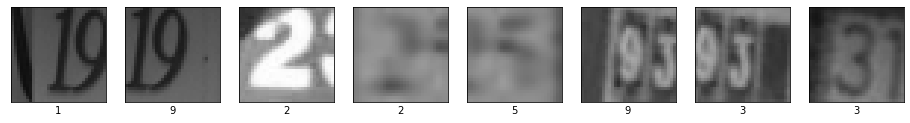

In [11]:
plot_img_grayscale(train_img, train_lbs)

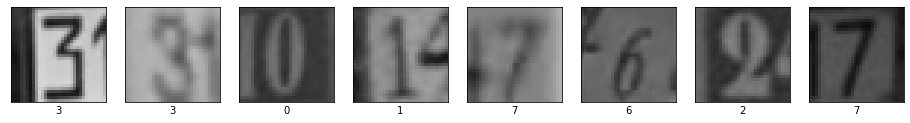

In [12]:
#Check if the validation set is divided correctely and print the data
plot_img_grayscale(validation_img, validation_lbs)

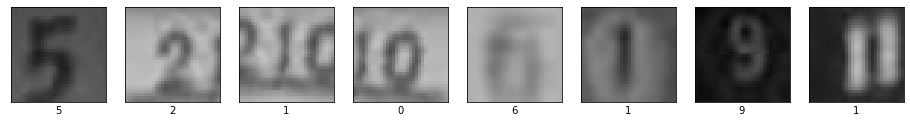

In [13]:
plot_img_grayscale(test_img, test_lbs)

## Data preprocessing

Two techniques are used in this order on the training set:

- **zero centering**: this is achieved by subctracting the mean of each colour channel (in this case just one beacuse the images are grayscaled) across said colour channel.
- **normalization**: divide each colour channel by its standard deviation (calculated after zero centering).

The same techniques are applied also on the validation set and test set but using the same parameters (mean and standard deviation) obtained from the training set.

In [0]:
train_mean = np.mean(train_img)
train_img = train_img - train_mean
train_std = np.std(train_img)
train_img = train_img / train_std

#do the same for validation and test set
validation_img = validation_img - train_mean
validation_img = validation_img / train_std
test_img = test_img - train_mean
test_img = test_img / train_std

## Hyper-parameters Optimization

In [0]:
##hyper parameters network structure, batch size, learning rate, drop-out

#do the train
#see what hyperparameters do better on val set
#redo the training with the best parameters on val set + train set
#evaluate on test set

In [0]:
###CONSTANTS

#training epochs
EPOCH_NUM = 7

#default batch size
BATCH_SIZE = 128

In [0]:
#allows to save the weights for a model in a directory called dir_name
def checkpoint(dir_name):
    #make dir otherwise the checkpoint creation throws Exception
    os.makedirs(dir_name, exist_ok=True)
    return tf.keras.callbacks.ModelCheckpoint(filepath=dir_name+'/cp-{epoch:02d}.hd5', verbose=0, period=3)

#create multiple learning rates
def create_learning_rate(i=0, power=-3, decay=False):
    def lr(epoch):
        if decay:
            return 10**power * ((0.7 - (0.025*i)) ** (epoch+1))
        else:
            return 10**power * (0.7 - (0.025*i))
            
    return tf.keras.callbacks.LearningRateScheduler(lr, verbose=0)

def create_callbacks(dir_name, lr=0, power=-3, decay=False, save=False):
    cb = []
    if save:
        cb.append(checkpoint(dir_name))
    cb.append(create_learning_rate(lr, power, decay))
    return cb

In [0]:
#define function to plot accuracy or loss
def plot_validation(history, loss=False):
    number_of_models = len(history)
    if loss:
        name, key, loc, f = 'Loss', 'loss', 'lower left', min
    else:
        name, key, loc, f = 'Accuracy', 'accuracy', 'upper left', max
    plt.figure(figsize=(8,3))
    for i in range(number_of_models):
        plt.plot(history[i].history['val_'+key], label='val_'+key+str(i))
        print('CNN {0}: Epochs={1:d}, Train {2}={3:.5f}, Validation {2}={4:.5f}'.format(
            i,len(history[i].history[key]),name,f(history[i].history[key]),f(history[i].history['val_'+key])))
    plt.title('Validation '+ name)
    plt.xlabel('Epochs')
    plt.ylabel(name)
    plt.legend(loc='upper left')
    plt.show()

In [0]:
#funciton to get the index of the model with the best accuracy or loss
def get_best_model(history, loss=False):
    number_of_models = len(history)
    key, op = ('val_loss', min) if loss else ('val_accuracy', max)
    max_values = []
    for i in range(number_of_models):
        best_value = op([x for x in history[i].history[key]])
        max_values.append(best_value)
    return max_values.index(op(max_values))

In [0]:
#save the history from a list of trained models
def save_history(hist_list, path):
    if path != None:
        for i in range(len(hist_list)):
            #make dir otherwise file creation throws exception
            os.makedirs(path+str(i), exist_ok=True)
            json.dump(str(hist_list[i].history), open(path+str(i)+"/hist"+str(i)+".json", 'w'))
    
def load_history(path):
    return json.load(open(path, 'r'))

### Validate the number of covolutional layers

In [0]:
val_models = []

models_number = 8
for i in range(models_number):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    if i > 0:
        model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    if i > 3:
        model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    if i > 0:
        model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    if i > 3:
        model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    
    if i == 2 or i == 5:
        model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    if i == 3 or i == 6:
        model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    if i == 7:
        model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))

        
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    val_models.append(model)

In [0]:
#validate models
val_errors = []

#create the directory where to save the checkpoints (otherwise throws a nosuch file exception)
base_name = BASE_PATH + 'validation/layers/var'


for i in range(models_number):
    val_errors.append(val_models[i].fit(train_img, train_lbs, batch_size=BATCH_SIZE, epochs=EPOCH_NUM,
                                        validation_data=(validation_img, validation_lbs), verbose = 1,
                                        callbacks=create_callbacks(base_name+str(i))))

Train on 65932 samples, validate on 7325 samples
Epoch 1/7
65932/65932 [==============================] - 4s 65us/sample - loss: 0.8722 - accuracy: 0.7361 - val_loss: 0.5186 - val_accuracy: 0.8603
Epoch 2/7
65932/65932 [==============================] - 4s 61us/sample - loss: 0.4796 - accuracy: 0.8677 - val_loss: 0.4539 - val_accuracy: 0.8752
Epoch 3/7
65932/65932 [==============================] - 4s 61us/sample - loss: 0.4002 - accuracy: 0.8872 - val_loss: 0.4404 - val_accuracy: 0.8745
Epoch 4/7
65932/65932 [==============================] - 4s 61us/sample - loss: 0.3449 - accuracy: 0.9019 - val_loss: 0.3854 - val_accuracy: 0.8871
Epoch 5/7
65932/65932 [==============================] - 4s 61us/sample - loss: 0.3036 - accuracy: 0.9124 - val_loss: 0.3765 - val_accuracy: 0.8926
Epoch 6/7
65932/65932 [==============================] - 4s 61us/sample - loss: 0.2667 - accuracy: 0.9229 - val_loss: 0.3801 - val_accuracy: 0.8897
Epoch 7/7
65932/65932 [==============================] - 4s 61u

CNN 0: Epochs=7, Train Accuracy=0.93214, Validation Accuracy=0.89256
CNN 1: Epochs=7, Train Accuracy=0.96509, Validation Accuracy=0.91345
CNN 2: Epochs=7, Train Accuracy=0.97001, Validation Accuracy=0.92000
CNN 3: Epochs=7, Train Accuracy=0.96361, Validation Accuracy=0.92246
CNN 4: Epochs=7, Train Accuracy=0.96060, Validation Accuracy=0.92000
CNN 5: Epochs=7, Train Accuracy=0.97004, Validation Accuracy=0.91700
CNN 6: Epochs=7, Train Accuracy=0.96137, Validation Accuracy=0.92860
CNN 7: Epochs=7, Train Accuracy=0.96392, Validation Accuracy=0.92724


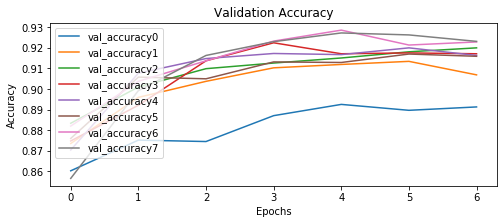

CNN 0: Epochs=7, Train Loss=0.23850, Validation Loss=0.37653
CNN 1: Epochs=7, Train Loss=0.11715, Validation Loss=0.30979
CNN 2: Epochs=7, Train Loss=0.10195, Validation Loss=0.29516
CNN 3: Epochs=7, Train Loss=0.12230, Validation Loss=0.28069
CNN 4: Epochs=7, Train Loss=0.13446, Validation Loss=0.26488
CNN 5: Epochs=7, Train Loss=0.10083, Validation Loss=0.28839
CNN 6: Epochs=7, Train Loss=0.13095, Validation Loss=0.26734
CNN 7: Epochs=7, Train Loss=0.12171, Validation Loss=0.25480


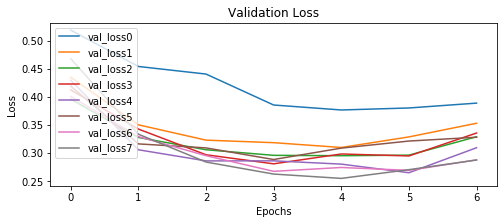

In [0]:
save_history(val_errors, base_name)

plot_validation(val_errors)

plot_validation(val_errors, loss=True)

In [0]:
best = get_best_model(val_errors, loss=True)
print("Model number {0} is the best one".format(best))
val_models[best].summary()

Model number 7 is the best one
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_77 (Conv2D)    

### Validate the number of filters per layer

In [0]:
val_models = []

models_number = 6
for i in range(models_number):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32+8*i, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.Conv2D(32+8*i, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(32+8*i, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(64+16*i, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64+16*i, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64+16*i, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(64+16*i, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64+16*i, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64+16*i, (3,3), padding='same', activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    val_models.append(model)

In [0]:
#validate models
val_errors = []

#create the directory where to save the checkpoints (otherwise throws a nosuch file exception)
base_name = BASE_PATH + 'validation/filters/var'


for i in range(models_number):
    val_errors.append(val_models[i].fit(train_img, train_lbs, batch_size=BATCH_SIZE, epochs=EPOCH_NUM,
                                        validation_data=(validation_img, validation_lbs), verbose = 1,
                                        callbacks=create_callbacks(base_name+str(i))))

Train on 65932 samples, validate on 7325 samples
Epoch 1/7
65932/65932 [==============================] - 12s 175us/sample - loss: 1.0305 - accuracy: 0.6527 - val_loss: 0.4344 - val_accuracy: 0.8668
Epoch 2/7
65932/65932 [==============================] - 11s 165us/sample - loss: 0.3503 - accuracy: 0.8942 - val_loss: 0.3206 - val_accuracy: 0.9054
Epoch 3/7
65932/65932 [==============================] - 11s 164us/sample - loss: 0.2624 - accuracy: 0.9243 - val_loss: 0.2750 - val_accuracy: 0.9204
Epoch 4/7
65932/65932 [==============================] - 11s 165us/sample - loss: 0.2159 - accuracy: 0.9362 - val_loss: 0.2621 - val_accuracy: 0.9229
Epoch 5/7
65932/65932 [==============================] - 11s 165us/sample - loss: 0.1821 - accuracy: 0.9471 - val_loss: 0.2702 - val_accuracy: 0.9211
Epoch 6/7
65932/65932 [==============================] - 11s 165us/sample - loss: 0.1529 - accuracy: 0.9553 - val_loss: 0.2768 - val_accuracy: 0.9216
Epoch 7/7
65932/65932 [============================

CNN 0: Epochs=7, Train Accuracy=0.96292, Validation Accuracy=0.92287
CNN 1: Epochs=7, Train Accuracy=0.96800, Validation Accuracy=0.92614
CNN 2: Epochs=7, Train Accuracy=0.96458, Validation Accuracy=0.92997
CNN 3: Epochs=7, Train Accuracy=0.96527, Validation Accuracy=0.92642
CNN 4: Epochs=7, Train Accuracy=0.96826, Validation Accuracy=0.93406
CNN 5: Epochs=7, Train Accuracy=0.96956, Validation Accuracy=0.93270


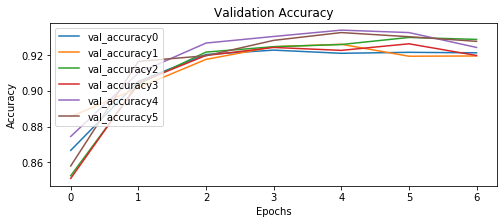

CNN 0: Epochs=7, Train Loss=0.12627, Validation Loss=0.26205
CNN 1: Epochs=7, Train Loss=0.10543, Validation Loss=0.25727
CNN 2: Epochs=7, Train Loss=0.11914, Validation Loss=0.24455
CNN 3: Epochs=7, Train Loss=0.11419, Validation Loss=0.25158
CNN 4: Epochs=7, Train Loss=0.10712, Validation Loss=0.22561
CNN 5: Epochs=7, Train Loss=0.10263, Validation Loss=0.23876


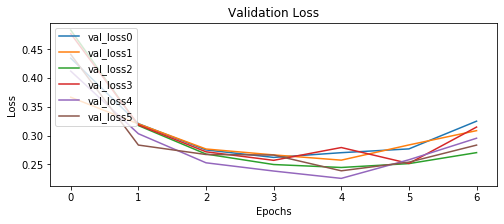

In [0]:
save_history(val_errors, base_name)

plot_validation(val_errors)

plot_validation(val_errors, loss=True)

In [0]:
BEST_FILTER = get_best_model(val_errors, loss=True)
print("Model number {0} is the best one".format(best))
val_models[BEST_FILTER].summary()

Model number 4 is the best one
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_120 (Conv2D)   

In [0]:
BEST_FILTER = 4
#first layer weights
FLK = 32+8*BEST_FILTER
#second layer weights
SLK = 64+16*BEST_FILTER
#third layer weights
TLK = 64+16*BEST_FILTER

### Validate the number neurons in the fully connected layer and a second fc layer

In [0]:
val_models = []

models_number = 6
for i in range(models_number):
    model = models.Sequential()
    
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    
    model.add(layers.Flatten())
    if i >= 3:
        model.add(layers.Dense(96+32*(i-3), activation='relu'))
        model.add(layers.Dense(64+32*(i-3), activation='relu'))
    else:
        model.add(layers.Dense(96+32*i, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    val_models.append(model)

In [0]:
#validate models
val_errors = []

#create the directory where to save the checkpoints (otherwise throws a nosuch file exception)
base_name = BASE_PATH + 'validation/fully_connected/var'


for i in range(models_number):
    val_errors.append(val_models[i].fit(train_img, train_lbs, batch_size=BATCH_SIZE, epochs=EPOCH_NUM,
                                        validation_data=(validation_img, validation_lbs), verbose = 1,
                                        callbacks=create_callbacks(base_name+str(i))))

Train on 65932 samples, validate on 7325 samples
Epoch 1/7
65932/65932 [==============================] - 23s 350us/sample - loss: 1.9759 - accuracy: 0.2953 - val_loss: 0.7423 - val_accuracy: 0.7672
Epoch 2/7
65932/65932 [==============================] - 23s 341us/sample - loss: 0.4611 - accuracy: 0.8582 - val_loss: 0.3320 - val_accuracy: 0.9016
Epoch 3/7
65932/65932 [==============================] - 23s 343us/sample - loss: 0.2748 - accuracy: 0.9195 - val_loss: 0.2830 - val_accuracy: 0.9193
Epoch 4/7
65932/65932 [==============================] - 23s 342us/sample - loss: 0.2184 - accuracy: 0.9372 - val_loss: 0.2400 - val_accuracy: 0.9300
Epoch 5/7
65932/65932 [==============================] - 23s 342us/sample - loss: 0.1835 - accuracy: 0.9477 - val_loss: 0.2386 - val_accuracy: 0.9316
Epoch 6/7
65932/65932 [==============================] - 23s 343us/sample - loss: 0.1530 - accuracy: 0.9555 - val_loss: 0.2369 - val_accuracy: 0.9332
Epoch 7/7
65932/65932 [============================

CNN 0: Epochs=7, Train Accuracy=0.96261, Validation Accuracy=0.93324
CNN 1: Epochs=7, Train Accuracy=0.96942, Validation Accuracy=0.92724
CNN 2: Epochs=7, Train Accuracy=0.96533, Validation Accuracy=0.93420
CNN 3: Epochs=7, Train Accuracy=0.96483, Validation Accuracy=0.93106
CNN 4: Epochs=7, Train Accuracy=0.96116, Validation Accuracy=0.93283
CNN 5: Epochs=7, Train Accuracy=0.96669, Validation Accuracy=0.92737


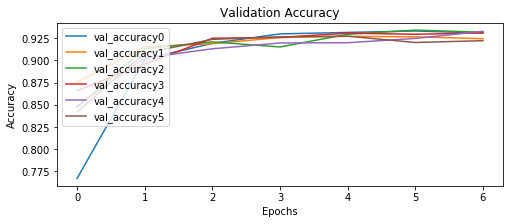

CNN 0: Epochs=7, Train Loss=0.12563, Validation Loss=0.23693
CNN 1: Epochs=7, Train Loss=0.09830, Validation Loss=0.24905
CNN 2: Epochs=7, Train Loss=0.11691, Validation Loss=0.24350
CNN 3: Epochs=7, Train Loss=0.12265, Validation Loss=0.23336
CNN 4: Epochs=7, Train Loss=0.12915, Validation Loss=0.24570
CNN 5: Epochs=7, Train Loss=0.11344, Validation Loss=0.25076


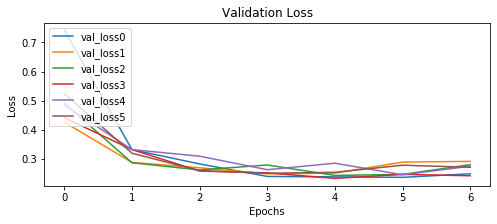

In [0]:
save_history(val_errors, base_name)

plot_validation(val_errors)

plot_validation(val_errors, loss=True)

In [0]:
BEST_FC = get_best_model(val_errors, loss=True)
print("Model number {0} is the best one".format(best))
val_models[BEST_FC].summary()

Model number 3 is the best one
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_202 (Conv2D)          (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_207 (Conv2D)   

In [0]:
BEST_FC = 3
FDL = 96+32*(BEST_FC-3)
SDL = 64+32*(BEST_FC-3)

### Validate droput
The model shows a tendence to overfit the data, some regularization techniques will be tried

In [0]:
val_models = []

DROPOUT = [round(x*0.05,2) for x in range(0,10)]

models_number = len(DROPOUT)
for i in range(models_number):
    model = models.Sequential()
    
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(FDL, activation='relu'))
    model.add(layers.Dropout(DROPOUT[i]))
    model.add(layers.Dense(SDL, activation='relu'))
    model.add(layers.Dropout(DROPOUT[i]))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    val_models.append(model)

In [0]:
#validate models
val_errors = []

#create the directory where to save the checkpoints (otherwise throws a nosuch file exception)
base_name = BASE_PATH + 'validation/dropout/var'


for i in range(models_number):
    val_errors.append(val_models[i].fit(train_img, train_lbs, batch_size=BATCH_SIZE, epochs=EPOCH_NUM+3,
                                        validation_data=(validation_img, validation_lbs), verbose = 1,
                                        callbacks=create_callbacks(base_name+str(i))))

Train on 65932 samples, validate on 7325 samples
Epoch 1/10
65932/65932 [==============================] - 24s 362us/sample - loss: 1.4870 - accuracy: 0.4857 - val_loss: 0.5866 - val_accuracy: 0.8220
Epoch 2/10
65932/65932 [==============================] - 23s 345us/sample - loss: 0.4132 - accuracy: 0.8752 - val_loss: 0.3667 - val_accuracy: 0.8932
Epoch 3/10
65932/65932 [==============================] - 23s 345us/sample - loss: 0.2793 - accuracy: 0.9179 - val_loss: 0.2717 - val_accuracy: 0.9214
Epoch 4/10
65932/65932 [==============================] - 23s 345us/sample - loss: 0.2299 - accuracy: 0.9326 - val_loss: 0.2625 - val_accuracy: 0.9241
Epoch 5/10
65932/65932 [==============================] - 23s 345us/sample - loss: 0.1959 - accuracy: 0.9440 - val_loss: 0.2586 - val_accuracy: 0.9259
Epoch 6/10
65932/65932 [==============================] - 23s 348us/sample - loss: 0.1703 - accuracy: 0.9513 - val_loss: 0.2400 - val_accuracy: 0.9308
Epoch 7/10
65932/65932 [=====================

CNN 0: Epochs=10, Train Accuracy=0.97375, Validation Accuracy=0.93584
CNN 1: Epochs=10, Train Accuracy=0.97230, Validation Accuracy=0.93365
CNN 2: Epochs=10, Train Accuracy=0.97341, Validation Accuracy=0.93515
CNN 3: Epochs=10, Train Accuracy=0.96920, Validation Accuracy=0.93638
CNN 4: Epochs=10, Train Accuracy=0.96669, Validation Accuracy=0.93775
CNN 5: Epochs=10, Train Accuracy=0.96554, Validation Accuracy=0.93734
CNN 6: Epochs=10, Train Accuracy=0.96320, Validation Accuracy=0.93966
CNN 7: Epochs=10, Train Accuracy=0.96111, Validation Accuracy=0.93256
CNN 8: Epochs=10, Train Accuracy=0.95849, Validation Accuracy=0.93761
CNN 9: Epochs=10, Train Accuracy=0.95157, Validation Accuracy=0.92901


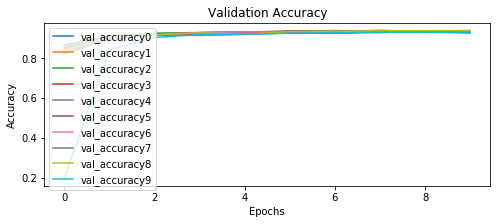

CNN 0: Epochs=10, Train Loss=0.08823, Validation Loss=0.23359
CNN 1: Epochs=10, Train Loss=0.09076, Validation Loss=0.23191
CNN 2: Epochs=10, Train Loss=0.08644, Validation Loss=0.23658
CNN 3: Epochs=10, Train Loss=0.10668, Validation Loss=0.26135
CNN 4: Epochs=10, Train Loss=0.11880, Validation Loss=0.22605
CNN 5: Epochs=10, Train Loss=0.12386, Validation Loss=0.24001
CNN 6: Epochs=10, Train Loss=0.13693, Validation Loss=0.23094
CNN 7: Epochs=10, Train Loss=0.14162, Validation Loss=0.25711
CNN 8: Epochs=10, Train Loss=0.15905, Validation Loss=0.24339
CNN 9: Epochs=10, Train Loss=0.19217, Validation Loss=0.26227


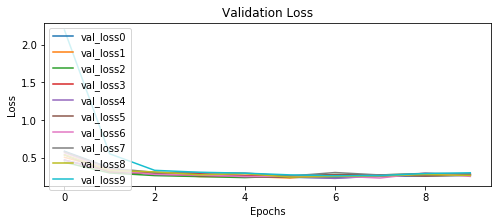

In [0]:
save_history(val_errors, base_name)

plot_validation(val_errors)

plot_validation(val_errors, loss=True)

In [0]:
BEST_DROP = get_best_model(val_errors, loss=True)
print("Model number {0} is the best one".format(best))
val_models[BEST_DROP].summary()

Model number 4 is the best one
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_454 (Conv2D)          (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_455 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_456 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_457 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_458 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_459 (Conv2D)   

In [21]:
BEST_DROP = 4
BEST_DROPOUT = DROPOUT[BEST_DROP]
BEST_DROPOUT

0.2

### Validate Batch Size

In [0]:
val_models = []

batch_base = 32
batch_increment = 32

models_number = 8
for i in range(models_number):
    model = models.Sequential()
    
for i in range(models_number):
    model = models.Sequential()
    
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))    
        
    model.add(layers.Flatten())
    model.add(layers.Dense(FDL, activation='relu'))
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(SDL, activation='relu'))
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    val_models.append(model)

In [0]:
#validate models
val_errors = []

#create the directory where to save the checkpoints (otherwise throws a nosuch file exception)
base_name = BASE_PATH + 'validation/batch/var'


for i in range(models_number):
    #adjusted batch size
    val_errors.append(val_models[i].fit(train_img, train_lbs, batch_size=batch_base + (i*batch_increment), epochs=EPOCH_NUM+3,
                                        validation_data=(validation_img, validation_lbs), verbose = 1,
                                        callbacks=create_callbacks(base_name+str(i))))

Train on 65932 samples, validate on 7325 samples
Epoch 1/10
65932/65932 [==============================] - 32s 492us/sample - loss: 1.3602 - accuracy: 0.5358 - val_loss: 0.4756 - val_accuracy: 0.8601
Epoch 2/10
65932/65932 [==============================] - 32s 478us/sample - loss: 0.4271 - accuracy: 0.8785 - val_loss: 0.3219 - val_accuracy: 0.9027
Epoch 3/10
65932/65932 [==============================] - 31s 476us/sample - loss: 0.3239 - accuracy: 0.9100 - val_loss: 0.2916 - val_accuracy: 0.9139
Epoch 4/10
65932/65932 [==============================] - 32s 481us/sample - loss: 0.2711 - accuracy: 0.9260 - val_loss: 0.2912 - val_accuracy: 0.9130
Epoch 5/10
65932/65932 [==============================] - 31s 478us/sample - loss: 0.2396 - accuracy: 0.9341 - val_loss: 0.2778 - val_accuracy: 0.9189
Epoch 6/10
65932/65932 [==============================] - 32s 479us/sample - loss: 0.2129 - accuracy: 0.9409 - val_loss: 0.2879 - val_accuracy: 0.9190
Epoch 7/10
65932/65932 [=====================

CNN 0: Epochs=10, Train Accuracy=0.95872, Validation Accuracy=0.92355
CNN 1: Epochs=10, Train Accuracy=0.96451, Validation Accuracy=0.93502
CNN 2: Epochs=10, Train Accuracy=0.96674, Validation Accuracy=0.93638
CNN 3: Epochs=10, Train Accuracy=0.96681, Validation Accuracy=0.93993
CNN 4: Epochs=10, Train Accuracy=0.96956, Validation Accuracy=0.93324
CNN 5: Epochs=10, Train Accuracy=0.96841, Validation Accuracy=0.93884
CNN 6: Epochs=10, Train Accuracy=0.96744, Validation Accuracy=0.93611
CNN 7: Epochs=10, Train Accuracy=0.96889, Validation Accuracy=0.93802


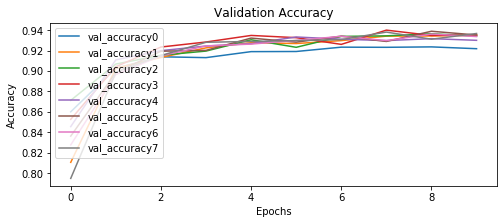

CNN 0: Epochs=10, Train Loss=0.14354, Validation Loss=0.27777
CNN 1: Epochs=10, Train Loss=0.12841, Validation Loss=0.24926
CNN 2: Epochs=10, Train Loss=0.11854, Validation Loss=0.23146
CNN 3: Epochs=10, Train Loss=0.11741, Validation Loss=0.23255
CNN 4: Epochs=10, Train Loss=0.10745, Validation Loss=0.24951
CNN 5: Epochs=10, Train Loss=0.11351, Validation Loss=0.24122
CNN 6: Epochs=10, Train Loss=0.11680, Validation Loss=0.24213
CNN 7: Epochs=10, Train Loss=0.11414, Validation Loss=0.24444


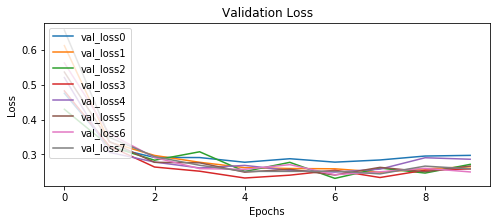

In [0]:
save_history(val_errors, base_name)

plot_validation(val_errors)

plot_validation(val_errors, loss=True)

In [0]:
BEST_BATCH = get_best_model(val_errors, loss=True)
print("Model number {0} is the best one".format(best))
val_models[BEST_BATCH].summary()

Model number 2 is the best one
Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_742 (Conv2D)          (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_743 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_744 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_180 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_745 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_746 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_747 (Conv2D)  

In [23]:
BEST_BATCH = 2
BEST_BATCH_SIZE = batch_base+(BEST_BATCH*batch_increment)
BEST_BATCH_SIZE

96

### Validate L2 regularization

In [0]:
val_models = []

reg_factor = [0]+[round(0.0001*10**(-x),7) for x in range(1,3)]

models_number = len(reg_factor)
for i in range(models_number):
    model = models.Sequential()
    
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu', input_shape=(32,32,1),
                            kernel_regularizer=regularizers.l2(reg_factor[i])))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(reg_factor[i])))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(reg_factor[i])))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(reg_factor[i])))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(reg_factor[i])))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(reg_factor[i])))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(reg_factor[i])))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(reg_factor[i])))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(reg_factor[i])))

        
    model.add(layers.Flatten())
    model.add(layers.Dense(FDL, activation='relu', kernel_regularizer=regularizers.l2(reg_factor[i])))
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(SDL, activation='relu', kernel_regularizer=regularizers.l2(reg_factor[i])))
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    val_models.append(model)

In [0]:
#validate models
val_errors = []

base_name = BASE_PATH+'validation/l2_reg/var'


for i in range(models_number):
    val_errors.append(val_models[i].fit(train_img, train_lbs, batch_size=BEST_BATCH_SIZE, epochs=EPOCH_NUM*2,
                                        validation_data=(validation_img, validation_lbs), verbose = 1,
                                        callbacks=create_callbacks(base_name+str(i))))

Train on 65932 samples, validate on 7325 samples
Epoch 1/14
65932/65932 [==============================] - 25s 386us/sample - loss: 1.1126 - accuracy: 0.6320 - val_loss: 0.3944 - val_accuracy: 0.8845
Epoch 2/14
65932/65932 [==============================] - 24s 364us/sample - loss: 0.3776 - accuracy: 0.8943 - val_loss: 0.2877 - val_accuracy: 0.9141
Epoch 3/14
65932/65932 [==============================] - 24s 362us/sample - loss: 0.2894 - accuracy: 0.9209 - val_loss: 0.2604 - val_accuracy: 0.9233
Epoch 4/14
65932/65932 [==============================] - 24s 361us/sample - loss: 0.2382 - accuracy: 0.9351 - val_loss: 0.2457 - val_accuracy: 0.9306
Epoch 5/14
65932/65932 [==============================] - 24s 363us/sample - loss: 0.2060 - accuracy: 0.9445 - val_loss: 0.2640 - val_accuracy: 0.9301
Epoch 6/14
65932/65932 [==============================] - 24s 361us/sample - loss: 0.1793 - accuracy: 0.9517 - val_loss: 0.2363 - val_accuracy: 0.9322
Epoch 7/14
65932/65932 [=====================

CNN 0: Epochs=14, Train Accuracy=0.97828, Validation Accuracy=0.93802
CNN 1: Epochs=14, Train Accuracy=0.97679, Validation Accuracy=0.93379
CNN 2: Epochs=14, Train Accuracy=0.97969, Validation Accuracy=0.93720


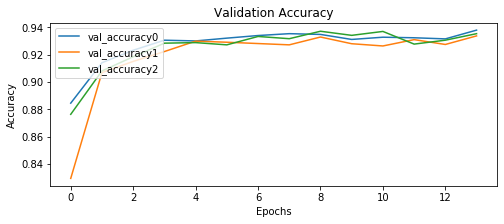

CNN 0: Epochs=14, Train Loss=0.07258, Validation Loss=0.23629
CNN 1: Epochs=14, Train Loss=0.10921, Validation Loss=0.27353
CNN 2: Epochs=14, Train Loss=0.07326, Validation Loss=0.24988


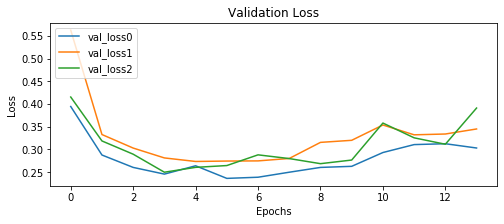

In [0]:
save_history(val_errors, base_name)

plot_validation(val_errors)

plot_validation(val_errors, loss=True)

In [0]:
#Rate base on accuracy because higher l2 regularization naturally inflates the loss
best = get_best_model(val_errors, loss=False)
print("Model number {0} is the best one".format(best))
val_models[best].summary()

Model number 0 is the best one
Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_850 (Conv2D)          (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_851 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_852 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_204 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_853 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_854 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_855 (Conv2D)  

### Validate Learning rate

In [0]:
val_models = []

models_number = 7
    
for i in range(models_number):
    model = models.Sequential()
    
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    
        
    model.add(layers.Flatten())
    model.add(layers.Dense(FDL, activation='relu'))
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(SDL, activation='relu'))
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    val_models.append(model)

In [0]:
#validate models
val_errors = []

base_name = BASE_PATH+'validation/learning_rate/var'


for i in range(models_number):
    val_errors.append(val_models[i].fit(train_img, train_lbs, batch_size=BEST_BATCH_SIZE, epochs=EPOCH_NUM+3,
                                        validation_data=(validation_img, validation_lbs), verbose = 1,
                                        callbacks=create_callbacks(base_name+str(i), lr=i)))

Train on 65932 samples, validate on 7325 samples
Epoch 1/10
65932/65932 [==============================] - 25s 377us/sample - loss: 1.2356 - accuracy: 0.5782 - val_loss: 0.4021 - val_accuracy: 0.8790
Epoch 2/10
65932/65932 [==============================] - 24s 364us/sample - loss: 0.4119 - accuracy: 0.8826 - val_loss: 0.3237 - val_accuracy: 0.9035
Epoch 3/10
65932/65932 [==============================] - 24s 364us/sample - loss: 0.3043 - accuracy: 0.9166 - val_loss: 0.2804 - val_accuracy: 0.9192
Epoch 4/10
65932/65932 [==============================] - 24s 364us/sample - loss: 0.2539 - accuracy: 0.9311 - val_loss: 0.2592 - val_accuracy: 0.9251
Epoch 5/10
65932/65932 [==============================] - 24s 364us/sample - loss: 0.2123 - accuracy: 0.9422 - val_loss: 0.2612 - val_accuracy: 0.9264
Epoch 6/10
65932/65932 [==============================] - 24s 363us/sample - loss: 0.1821 - accuracy: 0.9512 - val_loss: 0.2406 - val_accuracy: 0.9306
Epoch 7/10
65932/65932 [=====================

CNN 0: Epochs=10, Train Accuracy=0.96898, Validation Accuracy=0.93392
CNN 1: Epochs=10, Train Accuracy=0.96988, Validation Accuracy=0.93597
CNN 2: Epochs=10, Train Accuracy=0.96903, Validation Accuracy=0.93597
CNN 3: Epochs=10, Train Accuracy=0.96895, Validation Accuracy=0.93802
CNN 4: Epochs=10, Train Accuracy=0.96795, Validation Accuracy=0.93365
CNN 5: Epochs=10, Train Accuracy=0.96856, Validation Accuracy=0.93857
CNN 6: Epochs=10, Train Accuracy=0.97082, Validation Accuracy=0.93611


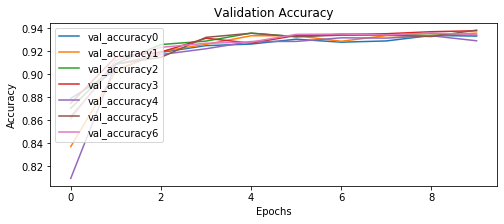

CNN 0: Epochs=10, Train Loss=0.10781, Validation Loss=0.24057
CNN 1: Epochs=10, Train Loss=0.10845, Validation Loss=0.23574
CNN 2: Epochs=10, Train Loss=0.10793, Validation Loss=0.23024
CNN 3: Epochs=10, Train Loss=0.10673, Validation Loss=0.23154
CNN 4: Epochs=10, Train Loss=0.11350, Validation Loss=0.24783
CNN 5: Epochs=10, Train Loss=0.11001, Validation Loss=0.23127
CNN 6: Epochs=10, Train Loss=0.10282, Validation Loss=0.24343


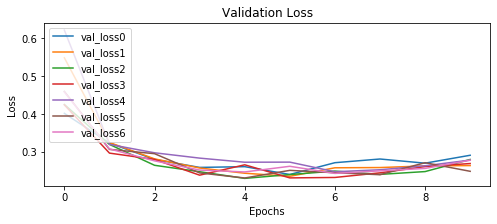

In [0]:
save_history(val_errors, base_name)

plot_validation(val_errors)

plot_validation(val_errors, loss=True)

In [0]:
BEST_LEARNING = get_best_model(val_errors, loss=True)
print("Model number {0} is the best one".format(best))
val_models[BEST_LEARNING].summary()

Model number 2 is the best one
Model: "sequential_154"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1030 (Conv2D)         (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_1031 (Conv2D)         (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_1032 (Conv2D)         (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_244 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1033 (Conv2D)         (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_1034 (Conv2D)         (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_1035 (Conv2D) 

In [0]:
BEST_LEARNING = 2
BEST_LR = BEST_LEARNING

### Validate Learning rate decay

In [0]:
val_models = []

models_number = 1
    
for i in range(models_number):
    model = models.Sequential()
    
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    
        
    model.add(layers.Flatten())
    model.add(layers.Dense(FDL, activation='relu'))
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(SDL, activation='relu'))
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    val_models.append(model)

In [67]:
#validate models
val_errors = []

base_name = BASE_PATH+'validation/lr_decay/var'


for i in range(models_number):
    val_errors.append(val_models[i].fit(train_img, train_lbs, batch_size=BEST_BATCH_SIZE, epochs=EPOCH_NUM*2,
                                        validation_data=(validation_img, validation_lbs), verbose = 1,
                                        callbacks=create_callbacks(base_name+str(i), lr=BEST_LR, decay=True)))

Train on 65932 samples, validate on 7325 samples
Epoch 1/14
65932/65932 [==============================] - 25s 375us/sample - loss: 1.2246 - accuracy: 0.5925 - val_loss: 0.4653 - val_accuracy: 0.8591
Epoch 2/14
65932/65932 [==============================] - 24s 365us/sample - loss: 0.4103 - accuracy: 0.8831 - val_loss: 0.3123 - val_accuracy: 0.9063
Epoch 3/14
65932/65932 [==============================] - 24s 362us/sample - loss: 0.2843 - accuracy: 0.9216 - val_loss: 0.2741 - val_accuracy: 0.9189
Epoch 4/14
65932/65932 [==============================] - 24s 362us/sample - loss: 0.2264 - accuracy: 0.9381 - val_loss: 0.2380 - val_accuracy: 0.9306
Epoch 5/14
65932/65932 [==============================] - 24s 363us/sample - loss: 0.1898 - accuracy: 0.9495 - val_loss: 0.2447 - val_accuracy: 0.9319
Epoch 6/14
65932/65932 [==============================] - 24s 361us/sample - loss: 0.1669 - accuracy: 0.9566 - val_loss: 0.2313 - val_accuracy: 0.9349
Epoch 7/14
65932/65932 [=====================

CNN 0: Epochs=14, Train Accuracy=0.97708, Validation Accuracy=0.93734


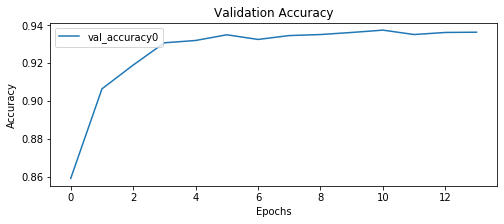

CNN 0: Epochs=14, Train Loss=0.08628, Validation Loss=0.23127


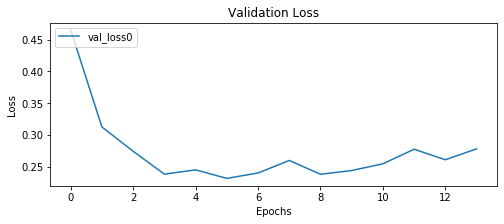

In [68]:
save_history(val_errors, base_name)

plot_validation(val_errors)

plot_validation(val_errors, loss=True)

In [69]:
val_errors[0].history['lr']

[0.00065,
 0.0004225,
 0.000274625,
 0.00017850625,
 0.00011602906,
 7.541889e-05,
 4.9022277e-05,
 4.9022277e-05,
 4.9022277e-05,
 4.9022277e-05,
 4.9022277e-05,
 4.9022277e-05,
 4.9022277e-05,
 4.9022277e-05]

In [70]:
best = get_best_model(val_errors, loss=True)
print("Model number {0} is the best one".format(best))
val_models[best].summary()

Model number 0 is the best one
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_252 (Conv2D)          (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_256 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_257 (Conv2D)   

### Validate Batch Normalization


In [0]:
val_models = []

models_number = 1
    
for i in range(models_number):
    model = models.Sequential()
    
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(FLK, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(SLK, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(TLK, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization()) 
        
    model.add(layers.Flatten())
    model.add(layers.Dense(FDL, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(SDL, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    val_models.append(model)

In [80]:
#validate models
val_errors = []

#create the directory where to save the checkpoints (otherwise throws a nosuch file exception)
base_name = BASE_PATH + 'validation/batch_norm/var'


for i in range(models_number):
    val_errors.append(val_models[i].fit(train_img, train_lbs, batch_size=BEST_BATCH_SIZE, epochs=EPOCH_NUM*2,
                                        validation_data=(validation_img, validation_lbs), verbose = 1,
                                        callbacks=create_callbacks(base_name+str(i), lr=BEST_LR, decay=True)))

Train on 65932 samples, validate on 7325 samples
Epoch 1/14
33312/65932 [==============>...............] - ETA: 15s - loss: 1.2455 - accuracy: 0.6047

KeyboardInterrupt: ignored

CNN 0: Epochs=14, Train Accuracy=0.99816, Validation Accuracy=0.94799


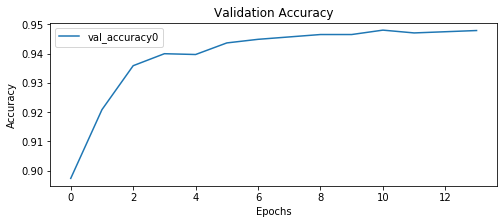

CNN 0: Epochs=14, Train Loss=0.01236, Validation Loss=0.21473


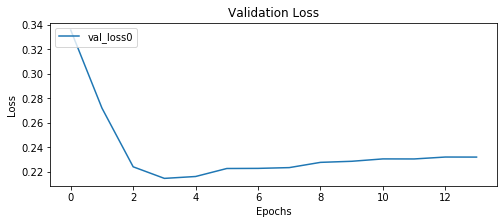

In [0]:
save_history(val_errors, base_name)

plot_validation(val_errors)

plot_validation(val_errors, loss=True)

In [0]:
best = get_best_model(val_errors, loss=True)
print("Model number {0} is the best one".format(best))
val_models[best].summary()

Model number 4 is the best one
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 32, 32, 56)        560       
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 32, 32, 56)        28280     
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 32, 32, 56)        28280     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 16, 16, 112)       56560     
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 16, 16, 112)       113008    
_________________________________________________________________
conv2d_173 (Conv2D)   

### Increase model

In [0]:
val_models = []

models_number = 1
    
for i in range(models_number):
    model = models.Sequential()
    
    model.add(layers.Conv2D(FLK+64, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(FLK+64, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(FLK+64, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(FLK+64, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(FLK+64, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(FLK+64, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(FLK+64, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(SLK+128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(SLK+128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(SLK+128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(SLK+128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(SLK+128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(SLK+128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(TLK+256, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(TLK+256, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(TLK+256, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(TLK+256, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(TLK+256, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    
       
    model.add(layers.Flatten())
    model.add(layers.Dense(FDL+256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(SDL+128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(BEST_DROPOUT))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    val_models.append(model)

In [1]:
#validate models
val_errors = []

#create the directory where to save the checkpoints (otherwise throws a nosuch file exception)
base_name = BASE_PATH + 'validation/big/var'


for i in range(models_number):
    val_errors.append(val_models[i].fit(train_img, train_lbs, batch_size=BEST_BATCH_SIZE, epochs=EPOCH_NUM*2,
                                        validation_data=(validation_img, validation_lbs), verbose = 1,
                                        callbacks=create_callbacks(base_name+str(i), lr=BEST_LR, decay=True)))

NameError: ignored

CNN 0: Epochs=14, Train Accuracy=0.99923, Validation Accuracy=0.95495


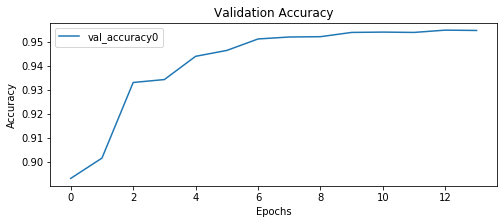

CNN 0: Epochs=14, Train Loss=0.00534, Validation Loss=0.19826


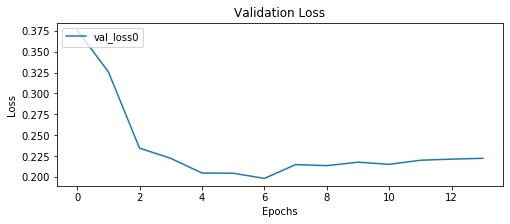

In [0]:
save_history(val_errors, base_name)

plot_validation(val_errors)

plot_validation(val_errors, loss=True)

In [0]:
best = get_best_model(val_errors, loss=True)
print("Model number {0} is the best one".format(best))
val_models[best].summary()

Model number 0 is the best one
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_376 (Conv2D)          (None, 32, 32, 128)       1280      
_________________________________________________________________
batch_normalization_238 (Bat (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_377 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_239 (Bat (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_378 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_240 (Bat (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_379 (Conv2D)   

In [0]:
#Best parameters in augmented model
BFLK = 64 + FLK
BSLK = 128 + SLK
BTLK = 256 + TLK
BFDL = 256 + FDL
BSDL = 128 + SDL

## Train and evaluate the model

In [0]:
import matplotlib.pyplot as plt
import numpy as np, random, os
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import json

#Read the datasets into memory
from scipy.io import loadmat

#reload the datasets and renormalize them, without splitting the validation set.
train = loadmat(TRAIN_PATH)
test = loadmat(TEST_PATH)
train_img, train_lbs = train['X'], train['y']
test_img, test_lbs = test['X'], test['y']

train_img = np.transpose(train_img,[3,0,1,2])
test_img = np.transpose(test_img,[3,0,1,2])

train_lbs = np.where(train_lbs!=10, train_lbs, 0)
test_lbs = np.where(test_lbs!= 10, test_lbs, 0)

In [0]:
def rgb_to_gray(rgb):
    r,g,b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = 0.2989*r+0.5870*g+0.1140*b
    return gray.reshape(rgb.shape[0], rgb.shape[1], rgb.shape[2], 1)

train_img = rgb_to_gray(train_img)
test_img = rgb_to_gray(test_img)

In [0]:
train_mean = np.mean(train_img)
train_img = train_img - train_mean
train_std = np.std(train_img)
train_img = train_img / train_std

#do the same for the test set
test_img = test_img - train_mean
test_img = test_img / train_std

In [0]:
#create the final model
model = models.Sequential()
    
    
model.add(layers.Conv2D(BFLK, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BFLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BFLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BFLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BFLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BFLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BFLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(BSLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BSLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BSLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BSLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BSLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BSLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
    
model.add(layers.Conv2D(BTLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BTLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BTLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BTLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(BTLK, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(BFDL, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(BEST_DROPOUT))
model.add(layers.Dense(BSDL, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(BEST_DROPOUT))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
base_name = BASE_PATH + 'training/model'
os.makedirs(base_name, exist_ok=True)

#train it
history = model.fit(train_img, train_lbs, batch_size=BEST_BATCH_SIZE, epochs=EPOCH_NUM*2,
                    validation_data=(test_img, test_lbs),
                    verbose = 1, callbacks=create_callbacks(base_name+str(i), lr=BEST_LR, decay=True))

Train on 73257 samples, validate on 26032 samples
Epoch 1/14
73257/73257 [==============================] - 328s 4ms/sample - loss: 0.8208 - accuracy: 0.7446 - val_loss: 0.3342 - val_accuracy: 0.8986
Epoch 2/14
73257/73257 [==============================] - 325s 4ms/sample - loss: 0.2724 - accuracy: 0.9198 - val_loss: 0.2438 - val_accuracy: 0.9284
Epoch 3/14
73257/73257 [==============================] - 325s 4ms/sample - loss: 0.1983 - accuracy: 0.9437 - val_loss: 0.2237 - val_accuracy: 0.9369
Epoch 4/14
73257/73257 [==============================] - 325s 4ms/sample - loss: 0.1503 - accuracy: 0.9578 - val_loss: 0.2258 - val_accuracy: 0.9352
Epoch 5/14
73257/73257 [==============================] - 325s 4ms/sample - loss: 0.1136 - accuracy: 0.9693 - val_loss: 0.1835 - val_accuracy: 0.9519
Epoch 6/14
73257/73257 [==============================] - 325s 4ms/sample - loss: 0.0698 - accuracy: 0.9816 - val_loss: 0.1849 - val_accuracy: 0.9507
Epoch 7/14
73257/73257 [==========================

CNN 0: Epochs=21, Train Accuracy=0.99889, Validation Accuracy=0.96258


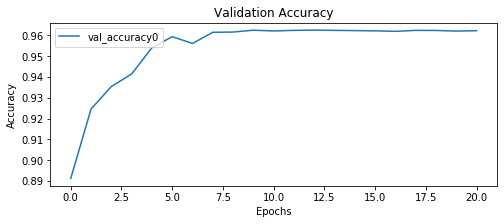

CNN 0: Epochs=21, Train Loss=0.00671, Validation Loss=0.15559


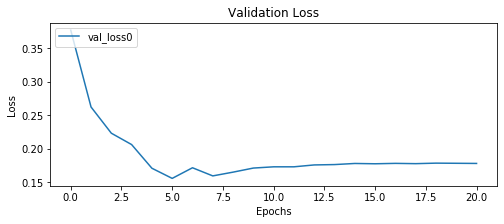

In [0]:
save_history([history], base_name)

plot_validation([history])

plot_validation([history], loss=True)

In [0]:
 model.evaluate(test_img, test_lbs)

26032/26032 [==============================] - 17s 644us/sample - loss: 0.1779 - accuracy: 0.9623


[0.17789589473856046, 0.9623156]

## Results analysis

In [0]:
#get predictions array
predictions = model.predict(test_img)

### Confusion matrix

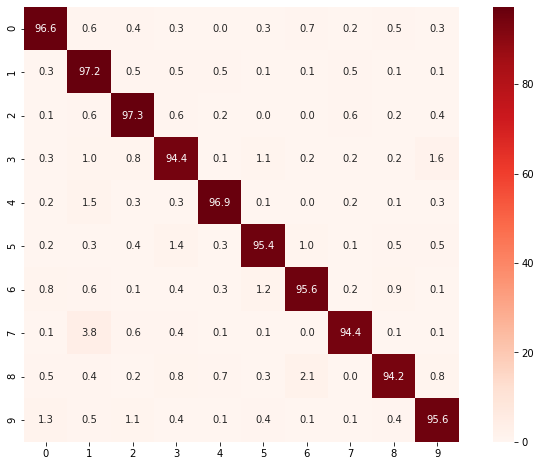

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate the confusion matrix
cm = confusion_matrix(y_true=test_lbs[:,0], y_pred=np.argmax(predictions, axis=1))

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='.1f', square=True);

In [0]:
#get the test images in a visualizable form (non-preprocessed)
test = loadmat(TEST_PATH)
test_img, test_lbs = test['X'], test['y']

test_img = np.transpose(test_img,[3,0,1,2])

test_img = rgb_to_gray(test_img)

test_lbs = np.where(test_lbs!= 10, test_lbs, 0)

In [0]:
#find wrong predictions that have the most confidence
#get max where prediction is wrong or zero otherwise
wrong_max = np.where(test_lbs[:,0] == np.argmax(predictions, axis=1), 0, np.max(predictions, axis=1))
#find indices that have higer values
worse_max = np.argpartition(wrong_only, -50)[-50:]
wrong_min = np.where(test_lbs[:,0] == np.argmax(predictions, axis=1), 5, np.max(predictions, axis=1))
worse_min = np.argpartition(wrong_only, 50)[:50]

### Most and least confident predictions

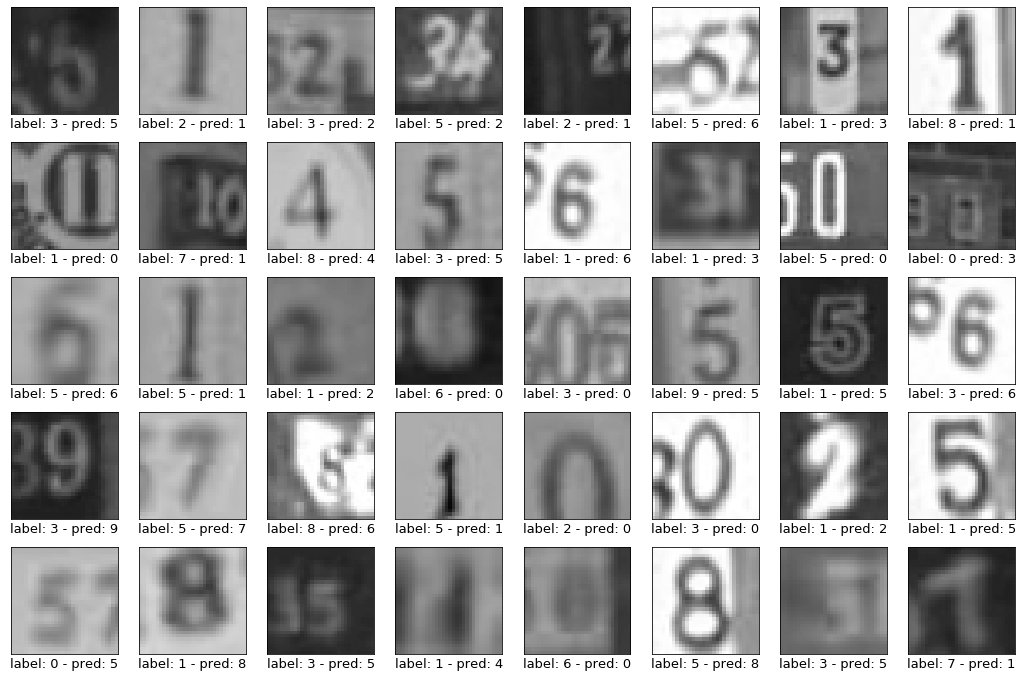

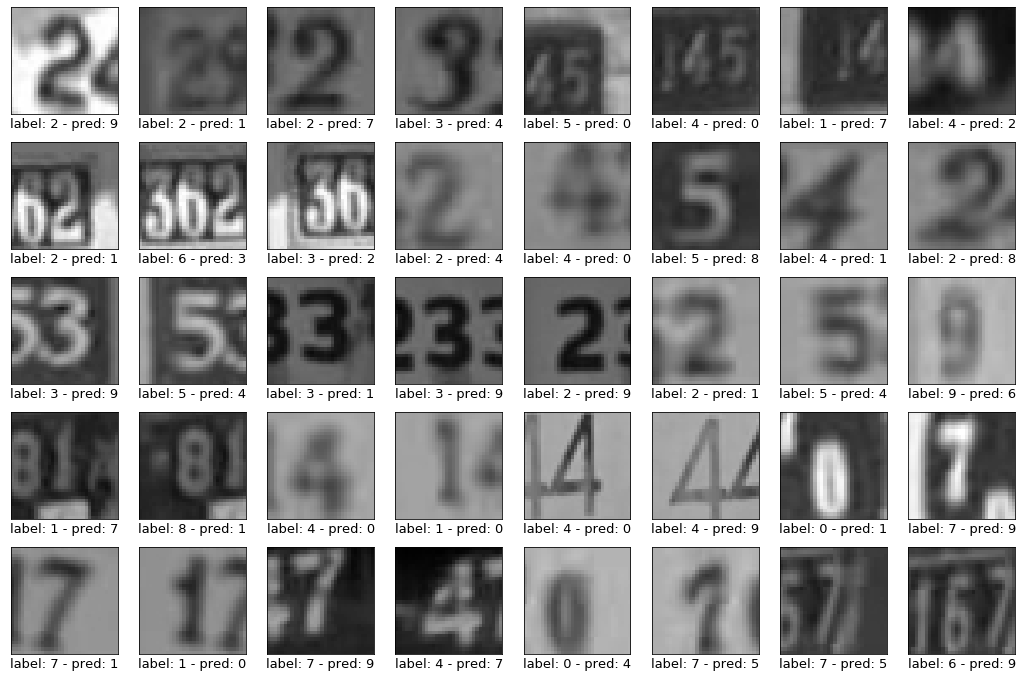

In [182]:

#Function to visualize image with their respective labels
def plot_img_extra(images, true_lbs, pred_lbs, rows=1, cols=8):
    plt.figure(figsize=(cols*2+2,rows*2+2))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i,:,:,0], cmap='gray',vmin=0, vmax=255)
        # The labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel('label: '+str(true_lbs[i][0])+' - pred: '+str(pred_lbs[i]), fontsize=13)
    plt.show()

predict_lbs = np.argmax(predictions, axis=1)[worse_max]
plot_img_extra(test_img[worse_max], test_lbs[worse_max], predict_lbs, rows=5)

predict_lbs = np.argmin(predicitons, axis=1)[worse_min]
plot_img_extra(test_img[worse_min], test_lbs[worse_min], predict_lbs, rows=5)

#top 40 images are the most confident predictions
#bottom 40 images are the least confident predictions
#top 40 shows mislabeling